In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
genomes = pd.read_csv('allCRISPRAnnotationData//gbffsumarry.csv',delimiter='~')
genomes.iloc[0,:]

Filepath                /home/sid/thesis_SidReed/bacterialGBFFs/rawdat...
GCF                                                       GCF_000005825.2
Accession Number                                                NC_013791
Organism                                        Bacillus pseudofirmus OF4
Genus                                                            Bacillus
Taxonomy                Bacteria;Firmicutes;Bacilli;Bacillales;Bacilla...
IsComplete                                                   full length.
NCBI_CRISPR_Arrays                                                      0
Genes (total)                                                        4263
CDS (total)                                                          4159
Genes (coding)                                                       4104
CDS (coding)                                                         4104
Genes (RNA)                                                           104
tRNAs                                 

66


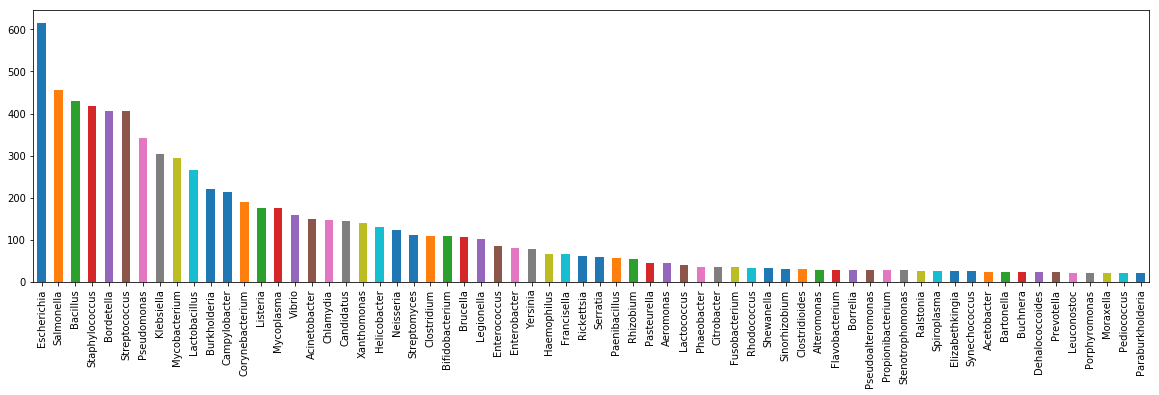

In [4]:
#print(genomes.columns)
gcounts = genomes['Genus'].value_counts()
print(len(gcounts[gcounts > 20]))

gcounts[gcounts > 20].plot(kind='bar',figsize=(20,5))

In [ ]:
import re
smol = gcounts[(gcounts > 5) & (gcounts < 10)].index.values.tolist()
for genus in genomes['Genus'].values.tolist():
    with open('{}_fps.txt'.format(genus),'w') as outf:
        for fp in genomes[genomes['Genus'] == genus]['Filepath'].values:
            outf.write(fp.replace('rawdata','rawdata_s1') + '\n')

In [ ]:
e = pd.read_csv('./NCBI_Reference_Prokaryotes.csv')
e.iloc[0]['RefSeq FTP']
with open('reference_proakaryote_ftp_links.txt','w') as pro:
    for link in e['RefSeq FTP']:
        pro.write(link + '\n')

In [ ]:
cgenera = []
for bac in open('strainsWithCRISPR.txt').readlines()[1:]:
#     print(bac)
    cgenera.append(bac.split(' ')[1])
print(len(cgenera))
print(len(set(cgenera)))

ncgenera = []
for bac in open('strainsWithOUTCRISPR.txt').readlines()[1:]:
    ncgenera.append(bac.split(' ')[1])
print(len(ncgenera))
print(len(set(ncgenera)))

In [ ]:
nconly= set(ncgenera) - set(set(cgenera).intersection(set(ncgenera))) #genera with only non-crispr strains
conly = set(cgenera) - set(set(cgenera).intersection(set(ncgenera))) #genera with only crispr strains
bothg = set(cgenera).intersection(set(ncgenera))
allg = set(cgenera).union(set(ncgenera))

downloaded_bothg = list(set(genomes['Genus'].values.tolist()).intersection(bothg))
# print(len(downloaded_bothg))
above30genomes = [x for x in downloaded_bothg if gcounts.loc[x] > 20]
print(len(above30genomes))
print('Legionella' in downloaded_bothg)

downloaded_nc = list(set(genomes['Genus'].values.tolist()).intersection(nconly))
print(len(downloaded_nc))
print('Legionella' in downloaded_nc)
above30genomesnc = [x for x in downloaded_nc if gcounts.loc[x] > 20]
print(len(above30genomesnc))
# print('Legionella' in downloaded_nc)

print('Legionella' in genomes['Genus'].values.tolist())

In [ ]:
from collections import defaultdict

cgenera = defaultdict(list)
for bac in open('strainsWithCRISPR.txt').readlines()[1:]:
    cgenera[bac.split(' ')[1]].append(bac.split(' ')[-1]) #count number of genomes for each uniq genera name without CRISPR

ncgenera = defaultdict(list)
for bac in open('strainsWithOUTCRISPR.txt').readlines()[1:]:
    ncgenera[bac.split(' ')[1]].append(bac.split(' ')[0]) #count number of genomes for each uniq genera name without CRISPR

ncgonly = set(list(ncgenera.keys())) - set(list(ncgenera.keys())).intersection(set(list(cgenera.keys())))# genera only in the ncgenera
ncgeneraonly = {k:list(set([x.strip('\n') for x in ncgenera[k]])) for k in list(ncgenera.keys()) if k in ncgonly}
ncgenera_scounts = {k:len(ncgeneraonly[k]) for k in list(ncgeneraonly.keys()) if len(ncgeneraonly[k]) > 4}
print(len(ncgenera_scounts.keys()))
print(ncgenera_scounts)

both = set(list(ncgenera.keys())).intersection(set(list(cgenera.keys())))
both = {k:list(set([x.strip('\n') for x in ncgenera[k]] + [x.strip('\n') for x in cgenera[k]])) for k in list(both)}
both_scounts = {k:len(both[k]) for k in list(both.keys()) if len(both[k]) > 15}
print(len(both_scounts.keys()))
print(both_scounts)

print(set(list(ncgenera_scounts.keys())).intersection(set(list(both_scounts.keys()))))
# ncgcounts = pd.Series(ncgenera).value_counts()
# ncgcounts = ncgcounts[ncgcounts.index in list(ncgonly) 
# print(ncgcounts[(ncgcounts > 15) & (ncgcounts < 100)])
# cgcounts = pd.Series(cgenera).value_counts()
# print(cgcounts[(cgcounts > 15) & (cgcounts < 100)])